In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

```yaml
nAgents: 10000
nSteps: 1000000
nSaveSteps: 10000
nRuns: 10
networkP: 0.8
networkM: 10
additionalLinksFraction: 0.01
virtualLayer: true
epidemicLayer: true
comorbidities: false
qVoterParameters:
  p: 0.3
  q: 6
epidemicLayerParameters:
  beta: 0.1
  gamma: 0.5
  mu: 0.9
  kappa: 0.1
maxInfectedTimeMean: 10
maxInfectedTimeStd: 5
positiveOpinionFraction: 1.0
infectedFraction: 0.1
fractionIllnessA: 0.0
fractionIllnessB: 0.0
outputFolder: simulations/results_change_p
firstParameterRange:
  start: 0.0
  end: 1.0
  count: 11
  vals: null
  type: p
secondParameterRange:
  start: 0.0
  end: 1.0
  count: 0
  vals: [ 0.0, 1.0 ]
  type: positiveOpinionFraction
linksRemoval: false
nQVoterPerStep: 1
```


In [46]:
def load_df(pis, p, posOpinion, nruns=10):
    dfs = []
    for n in range(nruns):
        path = f"../simulations/example_config_model_2/off_NAGENTS=10000_NSTEPS=1000000_NETWORKP=0.8_FRAC_LINKS=0.01_FRAC_POS_OPINION={posOpinion}_FRAC_INFECTED=0.1_QVOTER=p={p}_q=6_PIS={pis}_EPIDEMIC=beta=0.10_zeta=0.50_alpha=0.90_gamma=0.50_mu=0.90_kappa=0.10_I_TIME_MEAN=10.0_I_TIME_STD=5.0_NRUN={n}.tsv"
        df = pd.read_csv(path, sep="\t")
        dfs.append(df)
    dfs1 = pd.DataFrame(np.array([x.to_numpy() for x in dfs]).mean(axis=0),
                        index=df.index, 
                        columns=df.columns)
    return dfs1

pis = ['{:.1f}'.format(x / 10) for x in range(0, 11)]

# df = [load_df(p, '0.10', '0.9') for p in pis]
df = [load_df(p, '0.20', '0.1') for p in pis]

In [47]:
colormap = plt.cm.get_cmap('viridis', len(pis))
colors = [colormap(i) for i in range(len(pis))]

def print_run(dfs, labels, col, ylim=(-0.1, 1.1), xlim=(-1, 40), title=''):
    for i, df in enumerate(dfs):
        plt.plot(df.step / 10000, df[col], label=fr'{labels[i]}', color=colors[i])
    plt.xlabel("time")
    plt.ylim(*ylim)
    plt.xlim(*xlim)
        
def plot_per_metric(df, labels, col, ylim=(-0.1, 1.1), xlim=(-1, 40), ylog=False, xytext=[5, 0.85]):
    print_run(df, labels, col, ylim, xlim)
    plt.ylabel(col)
    if ylog:
        plt.yscale('log')
    plt.legend(ncol=2)


labels = ['{:.1f}'.format(x / 10) for x in range(0, 11)]

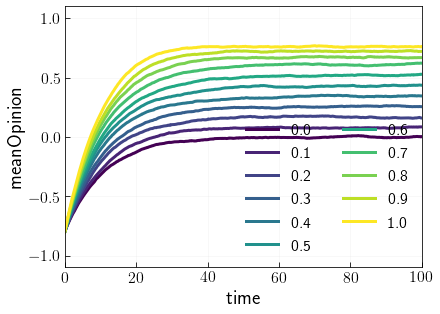

In [48]:
plot_per_metric(df, labels, 'meanOpinion', ylim=(-1.1, 1.1), xlim=(0, 100), xytext=[84, 0.2])
# plt.savefig('../plots/results_change_p_mean_opinion.pdf', bbox_inches='tight')

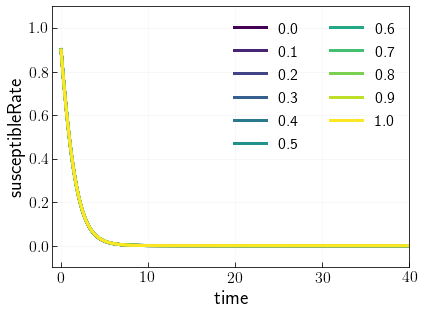

In [49]:
plot_per_metric(df, labels, 'susceptibleRate',  xytext=[1, 0.95])

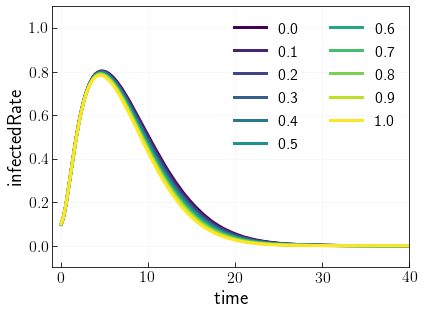

In [50]:
plot_per_metric(df, labels, 'infectedRate', xytext=[1, 0.95])
# plt.savefig('../plots/results_change_p_infected.pdf', bbox_inches='tight')

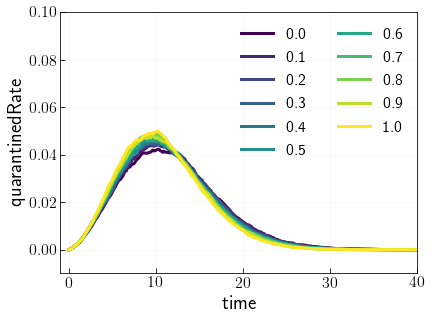

In [51]:
plot_per_metric(df, labels, 'quarantinedRate', ylim=(-0.01, 0.1), xytext=[1, 0.05])
# plt.savefig('../plots/results_change_p_quarantined.pdf', bbox_inches='tight')

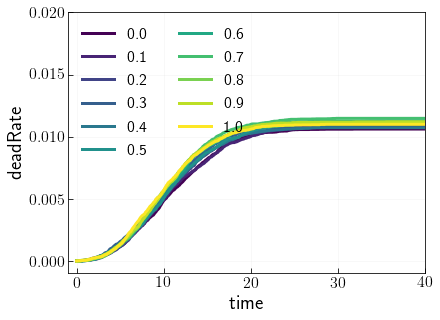

In [52]:
plot_per_metric(df, labels, 'deadRate', ylim=(-0.001, 0.02), xytext=[1, 0.0175])
# plt.savefig('../plots/results_change_p_dead.pdf', bbox_inches='tight')

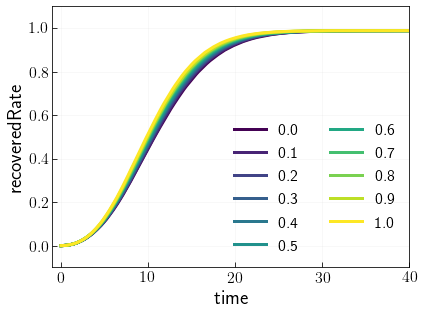

In [53]:
plot_per_metric(df, labels, 'recoveredRate', xytext=[1, 0.95])

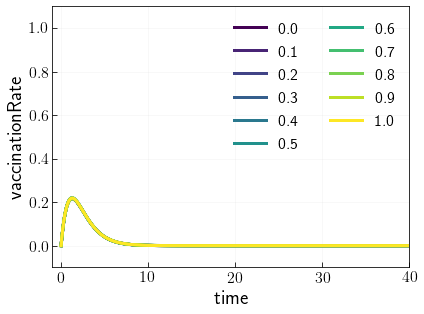

In [54]:
plot_per_metric(df, labels, 'vaccinationRate', xytext=[1, 0.95])